# System Reliablity Assessment for Security of Supply
---
Title: Power system relianbility modelling v1   
Authors: Dr Wei Sun (w.sun@ed.ac.uk), Yifan Wang   
Date: 17-Nov-2022   
<!-- --- -->

In [1]:
import time
st = time.time()

In [2]:
import os
from dotenv import find_dotenv, load_dotenv
load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [3]:
import numpy as np
import pypsa
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import cartopy.crs as ccrs

import data_reader_writer
import scotland_network

## Setting up simulation

Set the required inputs for the LOPF: the start, end and year of simulation, and the timestep.

In [4]:
# write csv files for import
start = '2035-01-01 00:00:00'
end = '2035-12-31 23:30:00'
# year of simulation
year = int(start[0:4])
# time step as fraction of hour
time_step = 1.

Choose from one of the National Grid Future Energy Scenarios.

In [5]:
# scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
scenario = 'System Transformation'
# scenario = 'Steady Progression'

Choose a baseline year (from 2010-2020). The baseline year determines which historical load profile and weather dataset is used for the future year modelled. The National Grid FES modellers used 2012 as their baseline year.

In [6]:
year_baseline = 2020
# delet all except links

data_reader_writer is a script written to read in data from the various sources and write csv files in the format required for populating a PyPSA network object

In [7]:
data_reader_writer.data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
                               scenario=scenario, FES=2022, merge_generators=True)

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\loads.py:90: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '20/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '15/12/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '14/10/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '26/03/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '15

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\generators.py:272: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '20/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '15/12/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '14/10/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '26/03/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsi

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '22/12/2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '30/04/2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '31/03/2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '15/04/1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '14/11/1998' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsi

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '20/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '15/12/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '14/10/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '26/03/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '15/06/2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsi

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '20/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '15/12/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '14/10/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '26/03/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '15/06/2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsi

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '20/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '15/12/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '14/10/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '26/03/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsing '15/06/2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:109: UserWarning:

Parsi

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\storage.py:82: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\storage.py:241: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\generators.py:989: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\generators.py:990: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\generators.py:1045: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\generators.py:1046: FutureWarning:

The fram

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1755: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1761: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1767: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1773: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1778: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:393: FutureWarning:

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\generators.py:1320: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\generators.py:1328: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\generators.py:1336: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\generators.py:1351: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\generators.py:1356: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\generators.py:934: FutureWarning:

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1562: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1568: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1580: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1585: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1205: FutureWarning

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1606: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1612: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1618: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1624: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1629: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1205: FutureWarning

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1682: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1688: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1694: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1700: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1705: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1169: FutureWarning

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1485: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1491: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1497: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1503: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:1508: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

D:\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:76

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:314: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:315: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:314: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

F:\PyPSA\P

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:314: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:315: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:314: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

F:\PyPSA\P

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:315: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:314: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:315: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

F:\PyPSA\P

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:314: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:315: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:314: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

F:\PyPSA\P

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:314: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:315: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\renewables.py:314: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

F:\PyPSA\P

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\marginal_costs.py:30: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\marginal_costs.py:102: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\marginal_costs.py:52: FutureWarning:

pad is deprecated and will be removed in a future version. Use ffill instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\marginal_costs.py:58: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\marginal_costs.py:118: FutureWarning:

pad is deprecated and will be removed in a future version. Use ffill instead.

F:\PyPSA\PyPSA-GB-main\PyPSA-GB\marginal_costs.py:124: FutureWarning:

The frame.append method is deprecated and will be removed from

In [8]:
scotland_network.scotland()
scotland_network.interconnector()

Processed: buses.csv, 
loads.csv, 
generators.csv, 
storage_units.csv, 
generators-marginal_cost.csv, 
generators-p_max_pu.csv, 
loads-p_set.csv, 
links.csv, 
lines.csv, 
links.csv (from lines), 
snapshots.csv


In [9]:
network = pypsa.Network()
network.import_from_csv_folder('LOPF_data_Scotland')

Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 1], imported network file PyPSA version None.

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
Index(['Moyle', 'NorthConnect', 'Neilston-Deeside', 'Strathaven-Harker',
       'Eccles-Stella West'],
      dtype='object')
Index(['Moyle', 'NorthConnect'], dtype='object', name='name')
Index(['Neilston-Deeside', 'Strathaven-Harker', 'Eccles-Stella West'], dtype='object', name='name')
INFO:pypsa.io:Imported network LOPF_data_Scotland has buses, generators, lines, links, loads, storage_units


In [10]:
# network.storage_units = network.storage_units[network.storage_units['carrier']=='Pumped Storage Hydroelectric']

Lines need to be scaled up to accomadate for future generation, and specific analysis will be done on this in a later notebook.
Note: interconnects are links in future, so don't need to be selective here (as was required in historical simulation).

In [11]:
contingency_factor = 4
network.lines.s_max_pu *= contingency_factor

## System reliablity modelling for security of supply.
The method of  power system reliability modeling is based on Capacity Outage Probability Table
(ref: )

Input Description:
- GENERATOR CAPACITIES is the  capacity of each generator
- GENERATOR OUTAGE is corresponding Forced Outage Rate (EFORd) for each generator (namely, the breakdown rate)

Output Description:
- LOLP: [System Capacity Available, State Probabilities]
- LOLE

## Generation type conversion for breakdown rate

The breakdown rates from National Grid Winter Outlook only include the main generation types. The generation types considered in pypsa-gb are much more that that. Therefore, mapping is needed and provided below.

For wind and other similar weather-dependent generation, they are labeled as 'weather dependent', as their output/contribution will be givenlater using the acctually generation profile time series.

For any type that are reckoned to be excluded at the lolp calculation, they are labeled as 'exlcuded'


In [12]:
bd_conversion_type = [['Coal', 'Nuclear', 'Oil', 'Wind Offshore', 'Wind Onshore', 'Solar Photovoltaics', 'Large Hydro', 'Small Hydro', 'Anaerobic Digestion', 'EfW Incineration', 'Landfill Gas', 'Sewage Sludge Digestion', 'Shoreline Wave', 'Tidal Barrage and Tidal Stream', 'Biomass (co-firing)', 'Biomass (dedicated)','Pumped Storage Hydroelectric', 'Battery', 'Compressed Air', 'Liquid Air', 'Interconnector', 'Englandconnector',
                       'CCS Gas', 'CCS Biomass', 'Hydrogen', 'Unmet Load', 'Tidal lagoon', 'Tidal stream', 'Wave power', 'Waste'],
                      ['Coal', 'Nuclear', 'OCGT', 'Weather Dependent', 'Weather Dependent', 'Weather Dependent', 'Hydro', 'Hydro', 'Biomass', 'Biomass', 'Biomass', 'Biomass', 'Excluded', 'Excluded', 'Biomass', 'Biomass','Pumped storage', 'Battery', 'CCGT', 'CCGT', 'Interconnector', 'Englandconnector',
                       'CCGT', 'Biomass', 'CCGT', 'Excluded', 'Excluded', 'Excluded', 'Excluded', 'Biomass']]

In [13]:
bd_conversion_type_csv = pd.DataFrame(bd_conversion_type).T
bd_conversion_type_csv

,0,1
0,Coal,Coal
1,Nuclear,Nuclear
2,Oil,OCGT
3,Wind Offshore,Weather Dependent
4,Wind Onshore,Weather Dependent
5,Solar Photovoltaics,Weather Dependent
6,Large Hydro,Hydro
7,Small Hydro,Hydro
8,Anaerobic Digestion,Biomass
9,EfW Incineration,Biomass


## Breakdown rate table

This is based on NG winter outlook. It would be subject to changes based on the users' knowledges or more updated information.  
Reference: https://www.nationalgrideso.com/document/268346/download page 12     
Battery reference: https://www.emrdeliverybody.com/Lists/Latest%20News/Attachments/150/Duration%20Limited%20Storage%20De-Rating%20Factor%20Assessment%20-%20Final.pdf page 4    

In [14]:
breakdowwn_rate = {
    'Coal': 0.1,
    'CCGT': 0.06,
    'Nuclear': 0.1,
    'OCGT': 0.07,
    'Biomass': 0.06,
    'Hydro': 0.08,
    'Wind': 0.16,
    'Pumped storage': 0.03, # arbitrary, need to update
    'Interconnector': 0.2,
    'Englandconnector': 0.2,
    'Weather Dependent': 0,
    'Excluded': 1
}
br_csv = pd.DataFrame.from_dict(breakdowwn_rate,orient='index',columns=['Breakdown Rate'])
br_csv = br_csv.reset_index().rename(columns = {'index':'Type'})
br_csv

,Type,Breakdown Rate
0,Coal,0.10
1,CCGT,0.06
2,Nuclear,0.10
3,OCGT,0.07
4,Biomass,0.06
5,Hydro,0.08
6,Wind,0.16
7,Pumped storage,0.03
8,Interconnector,0.20
9,Englandconnector,0.20


In [15]:
breakdowwn_rate_battery = {
    '0.5h': 0.1789,
    '1.0h': 0.3644,
    '1.5h': 0.5228,
    '2.0h': 0.6479,
    '2.5h': 0.7547,
    '3.0h': 0.8203,
    '3.5h':0.8575,
    '4.0h': 0.9611 # 4+h
}
brb_csv = pd.DataFrame.from_dict(breakdowwn_rate_battery,orient='index',columns=['Breakdown Rate'])
brb_csv = brb_csv.reset_index().rename(columns = {'index':'Duration'})
brb_csv

,Duration,Breakdown Rate
0,0.5h,0.1789
1,1.0h,0.3644
2,1.5h,0.5228
3,2.0h,0.6479
4,2.5h,0.7547
5,3.0h,0.8203
6,3.5h,0.8575
7,4.0h,0.9611


## De-rate table 

Reference: https://www.nationalgrideso.com/document/268356/download

In [16]:
de_conversion_type = [['Coal', 'Nuclear', 'Oil', 'Wind Offshore', 'Wind Onshore', 'Solar Photovoltaics', 'Large Hydro', 'Small Hydro', 'Anaerobic Digestion', 'EfW Incineration', 'Landfill Gas', 'Sewage Sludge Digestion', 'Shoreline Wave', 'Tidal Barrage and Tidal Stream', 'Biomass (co-firing)', 'Biomass (dedicated)','Pumped Storage Hydroelectric', 'Battery', 'Compressed Air', 'Liquid Air', 'Interconnector', 'Englandconnector', 
                       'CCS Gas', 'CCS Biomass', 'Hydrogen', 'Unmet Load', 'Tidal lagoon', 'Tidal stream', 'Wave power','Waste'],
                      ['Coal', 'Nuclear', 'OCGT', 'Wind', 'Wind', 'Solar', 'Hydro', 'Hydro', 'Waste', 'Waste', 'Waste', 'Waste', 'Marine', 'Marine', 'Biomass', 'Biomass','Pumped storage', 'Battery storage', 'OCGT', 'OCGT', 'Interconnector', 'Interconnector',
                       'CCGT', 'Biomass', 'CCGT', 'Excluded', 'Marine', 'Marine', 'Marine','Waste']]

In [17]:
de_conversion_type_csv = pd.DataFrame(de_conversion_type).T
#bd_conversion_type_csv.to_csv('../data/de_conversion_type.csv',index=False)

In [18]:
de_conversion_type_csv

,0,1
0,Coal,Coal
1,Nuclear,Nuclear
2,Oil,OCGT
3,Wind Offshore,Wind
4,Wind Onshore,Wind
5,Solar Photovoltaics,Solar
6,Large Hydro,Hydro
7,Small Hydro,Hydro
8,Anaerobic Digestion,Waste
9,EfW Incineration,Waste


In [19]:
de_rate = {
    'Biomass': 0.88,
    'Waste': 0.745, # average for various
    'Coal': 0.76,
    'CCGT': 0.913, # CHP/cogeneration 
    'OCGT': 0.952, # gas & diesel reciprocating engines
    'Nuclear': 0.744,
    'Battery storage': 0.597,
    'Pumped storage': 0.952,
    'Hydro': 0.911,
    'Solar': 0.022,
    'Marine': 0.22,
    'Wind': 0.174, #offshore & onshore
    'DSR': 0.715,
    'Interconnector': 0.099,
    'Excluded': 0
}
de_csv = pd.DataFrame.from_dict(de_rate,orient='index',columns=['De-Rate'])
de_csv = de_csv.reset_index().rename(columns = {'index':'Type'})
de_csv

,Type,De-Rate
0,Biomass,0.880
1,Waste,0.745
2,Coal,0.760
3,CCGT,0.913
4,OCGT,0.952
5,Nuclear,0.744
6,Battery storage,0.597
7,Pumped storage,0.952
8,Hydro,0.911
9,Solar,0.022


In [20]:
# this just provide a option to read breakdown rate table from a .csv file, 
# rather than hard-coded in the notebook
import os
if not os.path.exists('../data/LOLE'):
    os.makedirs('../data/LOLE')
bd_conversion_type_csv.to_csv('../data/LOLE/bd_conversion_type.csv',index=False)
br_csv.to_csv('../data/LOLE/breakdown_rate.csv',index=False)
brb_csv.to_csv('../data/LOLE/breakdowwn_rate_battery.csv',index=False)
de_conversion_type_csv.to_csv('../data/LOLE/de_conversion_type.csv',index=False)
de_csv.to_csv('../data/LOLE/de_rate.csv',index=False)

In [21]:
system_reserve_requirment = 1200 #MW, from NG winter outlook 2022

## Calculate system margin, LOLP and LOLE

In [22]:
def get_rate(row, name_list, carrier, conversion_dict, power_stations, breakdown_rate, breakdowwn_rate_battery=None, storage_units= None):
    for i in range(len(carrier)):
        # if row[i] != [0]: only running stations
        name = name_list[i]
        fuel_type = convert_type(name, carrier, conversion_dict, power_stations)
        if fuel_type != 'Battery':
            rate = breakdown_rate[fuel_type]
        else:
            max_hours = storage_units[storage_units.index == name]['max_hours'].tolist()[0]
            max_hours = np.rint(max_hours * 2) / 2
            max_hours = min(max_hours, 4)
            rate = breakdowwn_rate_battery[str(max_hours) + 'h']        
        row[i] = rate
    return row

In [23]:
def convert_type(name, carrier, conversion_dict, power_stations):
    type0 = carrier[name]
    try:
        type1 = conversion_dict[type0]
    except:
        if type0 == 'Natural Gas':
            type1 = power_stations[power_stations['Station Name']==name]['Technology'].tolist()[0]
        else:
            type1 = 'Excluded'
#             if 'new_type_list' not in globals():
#                 global new_type_list
#                 new_type_list = list()
#             if type0 not in new_type_list:
#                 new_type_list.append(type0)
            print('Do not have break downrate for type ' + type0)
    return type1

In [24]:
breakdowwn_rate_battery = pd.read_csv('../data/LOLE/breakdowwn_rate_battery.csv',index_col=0)
breakdowwn_rate_battery = breakdowwn_rate_battery.to_dict()['Breakdown Rate']
breakdowwn_rate_battery

{'0.5h': 0.1789,
 '1.0h': 0.3644,
 '1.5h': 0.5228,
 '2.0h': 0.6479,
 '2.5h': 0.7547,
 '3.0h': 0.8203,
 '3.5h': 0.8575,
 '4.0h': 0.9611}

In [25]:
breakdown_rate = pd.read_csv('../data/LOLE/breakdown_rate.csv',index_col=0)

In [26]:
breakdowwn_rate_battery = pd.read_csv('../data/LOLE/breakdowwn_rate_battery.csv',index_col=0)

In [27]:
breakdowwn_rate_battery

,Breakdown Rate
Duration,
0.5h,0.1789
1.0h,0.3644
1.5h,0.5228
2.0h,0.6479
2.5h,0.7547
3.0h,0.8203
3.5h,0.8575
4.0h,0.9611


In [28]:
breakdowwn_rate_battery['Breakdown Rate'] = 1-(1-breakdowwn_rate_battery['Breakdown Rate'])*0

In [29]:
breakdowwn_rate_battery

,Breakdown Rate
Duration,
0.5h,1.0
1.0h,1.0
1.5h,1.0
2.0h,1.0
2.5h,1.0
3.0h,1.0
3.5h,1.0
4.0h,1.0


In [30]:
#  calculate lolp without running opf/uc
def LOLP(network, year, year_baseline=None, failures_type=None, failures_rate=None):
    
    # rate
    if year > 2020:
        year = year_baseline
    file = '../data/power stations/power_stations_locations_' + str(year) + '.csv'
    power_stations = pd.read_csv(file, encoding='unicode_escape')
    
    bd_conversion_csv = pd.read_csv('../data/LOLE/bd_conversion_type.csv',index_col=0)
    bd_conversion_dict = bd_conversion_csv.to_dict()['1']
    
    
    breakdown_rate = pd.read_csv('../data/LOLE/breakdown_rate.csv',index_col=0)
    
    breakdowwn_rate_battery = pd.read_csv('../data/LOLE/breakdowwn_rate_battery.csv',index_col=0)
    
    
    if (failures_type is not None) and (failures_type is not None):
        failures_type = [failures_type]
        failures_rate = [failures_rate]
        if len(failures_type) != len(failures_rate):
            failures_rate = failures_rate * len(failures_type)
        for _ in range(len(failures_type)):
            generator_type = failures_type[_]
            if generator_type != 'Battery':
                breakdown_rate.loc[generator_type] = 1 - (1 - breakdown_rate.loc[generator_type]) * failures_rate[_]
            else:
                breakdowwn_rate_battery['Breakdown Rate'] = 1 - (1-breakdowwn_rate_battery['Breakdown Rate']) * failures_rate[_]
            
    breakdown_rate = breakdown_rate.to_dict()['Breakdown Rate']
    breakdowwn_rate_battery = breakdowwn_rate_battery.to_dict()['Breakdown Rate']
    
    generators_name_list = network.generators.index.tolist() ##
    
    #  generator units' breakdown rate time-series dataframe: generators_rate
    generators_rate_col = generators_name_list
    generators_rate_index = network.snapshots.copy()
    generators_rate = pd.DataFrame(columns=generators_rate_col, index=generators_rate_index) 
    generators_rate.apply(lambda r: get_rate(r, generators_name_list, network.generators.carrier, bd_conversion_dict, power_stations, breakdown_rate), axis = 1)
    
    # storage units' breakdown rate time-series dataframe: storage_rate
    storage_units_name_list = network.storage_units.index.tolist() 
    storage_units_rate_col = storage_units_name_list
    storage_units_rate_index = network.snapshots.copy()
    storage_units_rate = pd.DataFrame(columns=storage_units_rate_col, index=storage_units_rate_index) ##
    storage_units_rate.apply(lambda r: get_rate(r, storage_units_name_list, network.storage_units.carrier, bd_conversion_dict, power_stations, breakdown_rate, breakdowwn_rate_battery, network.storage_units), axis = 1)
    
    # all units' breakdown rate
    pd_rate = pd.concat([generators_rate, storage_units_rate], axis=1)
    # pd_rate2 = pd_rate.copy()
    
    # caculate time series of weather dependent generators' outputs from input data 

    pd_stations = pd_rate.copy()
    pd_stations_w = pd_stations[network.generators.index.tolist()][(pd_rate == 0)].dropna(axis=1,how='all').fillna(0)
    pd_stations[network.generators.p_nom.index] = network.generators.p_nom.values
    pd_stations[network.storage_units.p_nom.index] = network.storage_units.p_nom.values
    pd_stations[pd_stations_w.columns] = network.generators_t.p_max_pu[pd_stations_w.columns] * network.generators.p_nom[pd_stations_w.columns]

    pd_stations_all = pd_stations.copy()
    
    pd_stations_w = pd_stations[pd_stations_w.columns.tolist()]#[(pd_rate == 0)].dropna(axis=1,how='all').fillna(0)
    ## Shoreline Wave, Tidal Barrage and Tidal Stream

    pd_stations = pd_stations[(pd_rate < 1) & (pd_rate > 0)].dropna(axis=1,how='all').fillna(0)
    
    # Note: now, the time series of breakdown rate ONLY include non weather dependent units (i.e. convertional units)
    pd_rate = pd_rate[(pd_rate < 1) & (pd_rate > 0)].dropna(axis=1,how='all').fillna(0)
    
    # net_demand
    # calculate net_demand from input data (value is empty)
    # net_demand = total demand - renewable (Weather Dependent) output.
    net_demand = network.loads_t.p_set.sum(axis=1) - pd_stations_w.sum(axis=1)
    
    
    # non renewable generator units' installed capacity
    installed_capacity = pd.concat([network.generators.p_nom, network.storage_units.p_nom], axis=0)[pd_stations.columns].to_numpy()
    
    return installed_capacity, pd_rate.to_numpy()[0], net_demand, pd_stations_all, pd_stations_w
    

In [31]:
def Margin(network, pd_stations,year, system_reserve_requirment, year_baseline=None):

    # rate
    if year > 2020:
        year = year_baseline
    file = '../data/power stations/power_stations_locations_' + str(year) + '.csv'
    power_stations = pd.read_csv(file, encoding='unicode_escape')
    
    de_conversion_csv = pd.read_csv('../data/LOLE/de_conversion_type.csv',index_col=0)
    de_conversion_dict = de_conversion_csv.to_dict()['1']
    
    de_rate = pd.read_csv('../data/LOLE/de_rate.csv',index_col=0)
    de_rate = de_rate.to_dict()['De-Rate']
    
    generators_name_list = network.generators.index.tolist() ##
    
    #  generator units' breakdown rate time-series dataframe: generators_rate
    generators_rate_col = generators_name_list
    generators_rate_index = network.snapshots.copy()
    generators_rate = pd.DataFrame(columns=generators_rate_col, index=generators_rate_index) 
    generators_rate.apply(lambda r: get_rate(r, generators_name_list, network.generators.carrier, de_conversion_dict, power_stations, de_rate), axis = 1)
    
    # storage units' breakdown rate time-series dataframe: storage_rate
    storage_units_name_list = network.storage_units.index.tolist() 
    storage_units_rate_col = storage_units_name_list
    storage_units_rate_index = network.snapshots.copy()
    storage_units_rate = pd.DataFrame(columns=storage_units_rate_col, index=storage_units_rate_index) ##
    storage_units_rate.apply(lambda r: get_rate(r, storage_units_name_list, network.storage_units.carrier, de_conversion_dict, power_stations, de_rate), axis = 1)
    
    # all units' breakdown rate
    pd_rate = pd.concat([generators_rate, storage_units_rate], axis=1) 
    
    # caculate time series of weather dependent generators' outputs from input data 

    pd_installed_capacity = pd.concat([network.generators.p_nom, network.storage_units.p_nom], axis=0)
    de_rated_capacity = (pd_installed_capacity * pd_rate).sum(axis =1)[0]
    margin = de_rated_capacity - network.loads_t.p_set.sum(axis=1) - system_reserve_requirment # reserve
    
    return de_rated_capacity, margin

In [32]:
installed_capacity, breakdwon_rate, net_demand, pd_stations_all, pd_stations_w = LOLP(network, year, year_baseline=year_baseline)

In [33]:
de_rated_capacity, margin = Margin(network, pd_stations_all, year, system_reserve_requirment, year_baseline=year_baseline)

In [34]:
de_rated_capacity

16565.79363567574

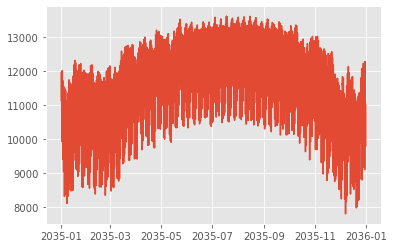

In [35]:
plt.plot(margin)

In [36]:
margin.describe()

count     8760.000000
mean     11463.035543
std       1060.175941
min       7807.804633
25%      10750.695433
50%      11597.635834
75%      12145.526479
max      13607.525800
dtype: float64

In [37]:
network.loads_t.p_set.sum(axis=1).describe()

count    8760.000000
mean     3902.758093
std      1060.175941
min      1758.267836
25%      3220.267157
50%      3768.157802
75%      4615.098203
max      7557.989003
dtype: float64

In [38]:
pd.Series(net_demand).describe()

count     8760.000000
mean    -19549.855698
std      14399.230743
min     -47237.598583
25%     -32156.584412
50%     -18830.932691
75%      -6489.391691
max       5134.141937
dtype: float64

Small generator units can be exlcuded from lolp calculation if necessary (i.e. assuming they are not contributing to reliability analysis)

In [39]:
def split_generators(installed_capacity, breakdwon_rate, num = None, value = 0, Round = False):
    if num == None:
        num = installed_capacity.shape[0]
    sorted_capacity = np.sort(installed_capacity[installed_capacity >= value])
    boundary = sorted_capacity[max(sorted_capacity.shape[0] - num, 0)]
    large_capacity = np.copy(installed_capacity[installed_capacity >= boundary])
    large_breakdwon_rate = np.copy(breakdwon_rate[installed_capacity >= boundary])
    expect_small_capacity = sum(installed_capacity[installed_capacity < boundary] * (1 - breakdwon_rate[installed_capacity < boundary]))
    if Round:
        large_capacity = np.rint(large_capacity)
    print('Number of laege generators: ' + str(large_capacity.shape[0]))
    print('Boundary: ' + str(boundary))
    
    return large_capacity, large_breakdwon_rate, expect_small_capacity

In [40]:
# exclude any generator small than 50 WM (criteria would be subject to change)
large_capacity, large_breakdwon_rate, expect_small_capacity = split_generators(installed_capacity, breakdwon_rate, value = 0, Round=True)

Number of laege generators: 70
Boundary: 0.1137931034482758


## Calculating PDF and CDF of power supply based on breakdown rate

In [41]:
def dict_add(A,B):
    for key,value in B.items():
        try:
            A[key] += value
        except:
            A[key] = value
    return A

In [42]:
def probability_function(capacity, breakdwon_rate):
    pdf = dict()
    pdf[0] = 1

    for i in range(large_capacity.shape[0]):
        prob_down = dict()
        prob_up = dict()
    
        for key,value in pdf.items():
            avail_value = np.float64(key)+large_capacity[i]
            try:
                prob_up[avail_value] += value * (1-large_breakdwon_rate[i])
            except:
                prob_up[avail_value] = value * (1-large_breakdwon_rate[i])
            try:
                prob_down[key] += value * large_breakdwon_rate[i]
            except:
                prob_down[key] = value * large_breakdwon_rate[i]
        pdf = dict_add(prob_up,prob_down)
    pdf = dict(sorted(pdf.items(),key=lambda d:d[0]))
    xx = sorted(pdf)
    yy = np.zeros(len(xx))
    cdf = np.zeros(len(xx))
    cdf_i = 0
    for i in range(len(pdf)):
        key = xx[i]
        yy[i] = pdf[key]
        cdf_i += yy[i]
        cdf[i] = cdf_i
    return xx, yy, pdf, cdf

In [43]:
xx, yy, pdf, cdf = probability_function(large_capacity, large_breakdwon_rate)

## plot and prettify the PDF of system generation capacity available

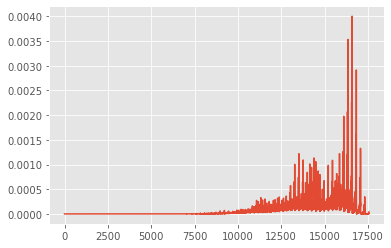

In [44]:
plt.plot(xx,yy)

In [45]:
np.mean(net_demand)

-19549.855698155665

(10535.4, 19314.9)

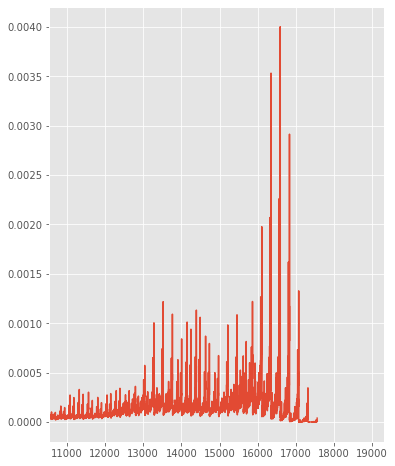

In [46]:
plt.figure(figsize=(6,8))
plt.plot(xx,yy)
plt.xlim(max(xx)*.6,max(xx)*1.1)

In [47]:
int_x = [round(x/100)*100 for x in xx]

(10535.4, 19314.9)

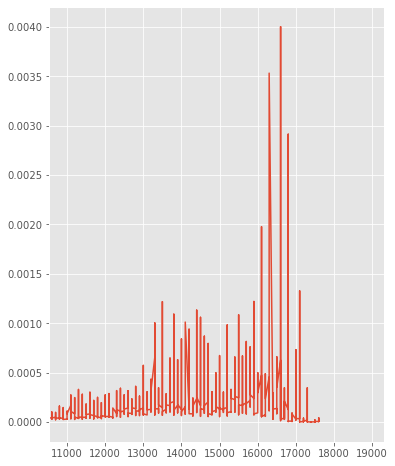

In [48]:
plt.figure(figsize=(6,8))
plt.plot(int_x,yy)
plt.xlim(max(xx)*.6,max(xx)*1.1)

## plot CDF of ystem generation capacity available

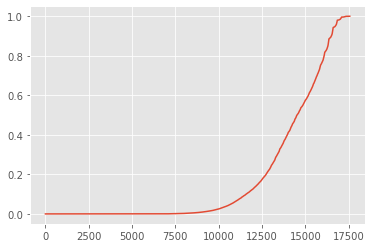

In [49]:
plt.plot(xx,cdf)

## calculating the LOLP at each time step

In [50]:
net_demand = network.loads_t.p_set.sum(axis=1) - pd_stations_w.sum(axis=1)

In [51]:
lolp = list()
for i in range(len(net_demand)):
    lolp.append(yy[xx<net_demand[i] - expect_small_capacity + system_reserve_requirment].sum())

In [52]:
lolp = list()
for i in range(len(net_demand)):
    lolp.append(yy[xx<net_demand[i] - expect_small_capacity + system_reserve_requirment].sum())
sum(lolp)

0.00036965052680794336

In [53]:
np.array(lolp)[np.array(lolp)>0]

array([3.50820490e-30, 9.53349036e-17, 3.83517313e-14, 2.04089937e-12,
       4.26714106e-20, 3.08363102e-13, 2.05856106e-09, 2.78313209e-08,
       2.60407208e-08, 9.23406580e-08, 1.48580809e-06, 1.54634558e-06,
       1.20121485e-06, 6.32154125e-07, 8.23927013e-09, 2.64567491e-13,
       4.45564374e-16, 3.30812219e-29, 6.38410585e-46, 1.32619360e-31,
       3.81565375e-14, 7.05620534e-10, 1.59804648e-09, 5.42078719e-12,
       7.87213541e-47, 1.86801325e-12, 1.43558043e-10, 1.52219339e-10,
       2.97935939e-10, 2.22550004e-16, 1.20233060e-45, 9.06752537e-21,
       5.69758810e-11, 4.96697292e-10, 2.89548248e-11, 1.48574708e-17,
       3.99650913e-17, 1.70562500e-20, 4.00131983e-48, 2.83712569e-24,
       6.31624077e-19, 1.65906333e-15, 1.23393404e-14, 9.15376815e-17,
       3.25942913e-16, 1.13377432e-11, 9.74372196e-09, 3.40881636e-06,
       1.02633398e-05, 3.86984220e-06, 2.20208924e-07, 1.29200239e-08,
       1.12776811e-09, 3.14641710e-10, 1.28909367e-10, 7.43277178e-11,
      

In [54]:
sum(np.array(lolp)==0)

7767

In [55]:
# lolp_min = np.where(lolp == min(lolp))
lolp_min = np.where(lolp == min(np.array(lolp)[np.array(lolp)>0]))
network.snapshots[lolp_min[0][0]]

Timestamp('2035-03-27 10:00:00')

In [56]:
lolp_max = np.where(lolp == max(lolp))
network.snapshots[lolp_max[0][0]]

Timestamp('2035-12-03 16:00:00')

## calculating the LOLE over the whole period

In [57]:
lole = sum(lolp)
print(f'the loss load expectation (LOLE) for the considered period are {lole} hours; the current UK regulation for LOLE is below 3 hours per year')

the loss load expectation (LOLE) for the considered period are 0.00036965052680794336 hours; the current UK regulation for LOLE is below 3 hours per year


## plot

In [58]:
plot_data = pd.DataFrame()
plot_data.index = network.snapshots
plot_data['demand'] = net_demand
plot_data['lolp'] = lolp

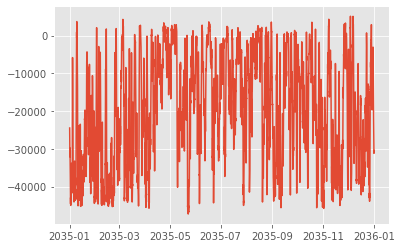

In [59]:
plt.plot(plot_data['demand'])

In [60]:
lolp_month = list()
for m in range(1,13):
    month_data = plot_data[plot_data.index.month == m]
    lolp_month.append(month_data['lolp'].tolist())

{'whiskers': [<matplotlib.lines.Line2D at 0x21bef9b5be0>,
 'caps': [<matplotlib.lines.Line2D at 0x21bef719e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x21bef9b5100>,
 'medians': [<matplotlib.lines.Line2D at 0x21bef7192e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x21bef719670>,
 'means': []}

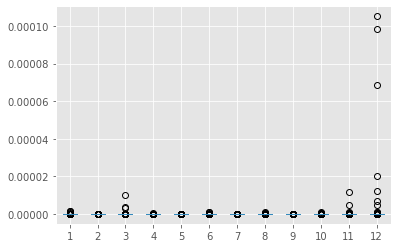

In [61]:
plt.boxplot(lolp_month)

In [62]:
lolp_hour = list()
for h in range(24):
    hour_data = plot_data[plot_data.index.hour == h]
    lolp_hour.append(hour_data['lolp'].mean())

([<matplotlib.axis.XTick at 0x21bef3ceeb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

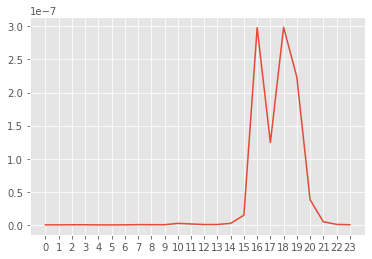

In [63]:
plt.plot(lolp_hour)
plt.xticks(range(24))

## Scenario

In [64]:
peak_demand = network.loads_t.p_set.sum(axis=1).max()
peak_demand

7557.989002751653

In [65]:
pd_peakload_period = pd.DataFrame(pd_stations_w.sum(axis=1),columns=['weather dependent capacity'])
pd_peakload_period

,weather dependent capacity
snapshot,
2035-01-01 00:00:00,28700.178177
2035-01-01 01:00:00,29961.575523
2035-01-01 02:00:00,31149.726691
2035-01-01 03:00:00,31859.822326
2035-01-01 04:00:00,32982.452411
...,...
2035-12-31 19:00:00,35317.464295
2035-12-31 20:00:00,35724.011104
2035-12-31 21:00:00,36146.553011


In [66]:
pd_peakload_period = pd_peakload_period[((pd_peakload_period.index.month<4)|(pd_peakload_period.index.month>10)) &
              (pd_peakload_period.index.weekday<6) &
              (pd_peakload_period.index.hour>6) & (pd_peakload_period.index.hour<20)]
pd_peakload_period

,weather dependent capacity
snapshot,
2035-01-01 07:00:00,35664.497592
2035-01-01 08:00:00,35797.676867
2035-01-01 09:00:00,35777.114199
2035-01-01 10:00:00,33882.906337
2035-01-01 11:00:00,34623.927082
...,...
2035-12-31 15:00:00,30836.848107
2035-12-31 16:00:00,31288.482954
2035-12-31 17:00:00,32802.962914


In [67]:
wdc = pd_peakload_period['weather dependent capacity'].to_numpy()

In [68]:
wdc.shape

(1690,)

In [69]:
lolp_p = 0
for i in range(wdc.shape[0]):
    lolp_p += yy[xx<peak_demand-wdc[i]-expect_small_capacity+system_reserve_requirment].sum()/wdc.shape[0]

In [70]:
lolp_p

1.2699568221390386e-05

### 2.1 Largest offshore wind farm failure 

In [71]:
largest_windfarm = network.generators_t.p_max_pu[network.generators[network.generators.carrier.isin(['Wind Onshore', 'Wind Offshore'])].p_nom.idxmax()] * network.generators[network.generators.carrier.isin(['Wind Onshore', 'Wind Offshore'])].p_nom.max()

In [72]:
pd_peakload_period['largest windfarm supply'] = largest_windfarm[largest_windfarm.index.isin(pd_peakload_period.index)]

In [73]:
lws = pd_peakload_period['largest windfarm supply'].to_numpy()

In [74]:
lolp = list()
for i in range(len(net_demand)):
    lolp.append(yy[xx<net_demand[i] + largest_windfarm[i] - expect_small_capacity + system_reserve_requirment].sum())

In [75]:
sum(lolp)

0.004584287002200087

In [76]:
lolp_p = 0
for i in range(wdc.shape[0]):
    lolp_p += yy[xx<peak_demand-wdc[i]+lws[i]-expect_small_capacity+system_reserve_requirment].sum()/wdc.shape[0]

In [77]:
lolp_p

4.319535230686988e-05

### 2.2 Long period of low RES power scenario

In [78]:
net_demand = network.loads_t.p_set.sum(axis=1) - pd_stations_w.sum(axis=1) * 0.8

In [79]:
lolp = list()
for i in range(len(net_demand)):
    lolp.append(yy[xx<net_demand[i] - expect_small_capacity + system_reserve_requirment].sum())

In [80]:
sum(lolp)

0.0009159160726926927

In [81]:
lolp_p = 0
for i in range(wdc.shape[0]):
    lolp_p += yy[xx<peak_demand-wdc[i]*0.8-expect_small_capacity+system_reserve_requirment].sum()/wdc.shape[0]

In [82]:
lolp_p

2.2848285345033682e-05

### 1 Gas supply issues 

In [83]:
installed_capacity, breakdwon_rate, net_demand, pd_stations_all, pd_stations_w = LOLP(network, year, year_baseline=year_baseline, failures_type=['CCGT','OCGT'], failures_rate=0.)

In [84]:
large_capacity, large_breakdwon_rate, expect_small_capacity = split_generators(installed_capacity, breakdwon_rate, value = 0, Round=True)
xx, yy, pdf, cdf = probability_function(large_capacity, large_breakdwon_rate)

Number of laege generators: 43
Boundary: 0.48


In [85]:
lolp = list()
for i in range(len(net_demand)):
    lolp.append(yy[xx<net_demand[i] - expect_small_capacity + system_reserve_requirment].sum())

In [86]:
sum(lolp)

0.01898506683728975

In [87]:
lolp_p = 0
for i in range(wdc.shape[0]):
    lolp_p += yy[xx<peak_demand-wdc[i]-expect_small_capacity+system_reserve_requirment].sum()/wdc.shape[0]

In [88]:
lolp_p

0.00018285833171315617

### 3.1 Storage failures

In [89]:
installed_capacity, breakdwon_rate, net_demand, pd_stations_all, pd_stations_w = LOLP(network, year, year_baseline=year_baseline, failures_type='Battery', failures_rate=0.)

In [90]:
large_capacity, large_breakdwon_rate, expect_small_capacity = split_generators(installed_capacity, breakdwon_rate, value = 0, Round=True)
xx, yy, pdf, cdf = probability_function(large_capacity, large_breakdwon_rate)

Number of laege generators: 62
Boundary: 0.1137931034482758


In [91]:
lolp = list()
for i in range(len(net_demand)):
    lolp.append(yy[xx<net_demand[i] - expect_small_capacity + system_reserve_requirment].sum())

In [92]:
sum(lolp)

0.0027106800203021493

In [93]:
lolp_p = 0
for i in range(wdc.shape[0]):
    lolp_p += yy[xx<peak_demand-wdc[i]-expect_small_capacity+system_reserve_requirment].sum()/wdc.shape[0]

In [94]:
lolp_p

5.123212618526525e-05

### 3.2 Interconnector failure

In [95]:
installed_capacity, breakdwon_rate, net_demand, pd_stations_all, pd_stations_w = LOLP(network, year, year_baseline=year_baseline, failures_type='Interconnector', failures_rate=0.)

In [96]:
large_capacity, large_breakdwon_rate, expect_small_capacity = split_generators(installed_capacity, breakdwon_rate, value = 0, Round=True)
xx, yy, pdf, cdf = probability_function(large_capacity, large_breakdwon_rate)

Number of laege generators: 68
Boundary: 0.1137931034482758


In [97]:
lolp = list()
for i in range(len(net_demand)):
    lolp.append(yy[xx<net_demand[i] - expect_small_capacity + system_reserve_requirment].sum())

In [98]:
sum(lolp)

0.003810421030819216

In [99]:
lolp_p = 0
for i in range(wdc.shape[0]):
    lolp_p += yy[xx<peak_demand-wdc[i]-expect_small_capacity+system_reserve_requirment].sum()/wdc.shape[0]

In [100]:
lolp_p

7.726924015867154e-05

## self-sufficient Scotland

In [101]:
installed_capacity, breakdwon_rate, net_demand, pd_stations_all, pd_stations_w = LOLP(network, year, year_baseline=year_baseline, failures_type=['Interconnector','Englandconnector'], failures_rate=0.)

In [102]:
large_capacity, large_breakdwon_rate, expect_small_capacity = split_generators(installed_capacity, breakdwon_rate, value = 0, Round=True)
xx, yy, pdf, cdf = probability_function(large_capacity, large_breakdwon_rate)

Number of laege generators: 65
Boundary: 0.1137931034482758


In [103]:
lolp = list()
for i in range(len(net_demand)):
    lolp.append(yy[xx<net_demand[i] - expect_small_capacity + system_reserve_requirment].sum())

In [104]:
sum(lolp)

0.47219363055894864

In [105]:
# test lole changes with adding increased firm capacity 
for i_ in range(1,10):
    lolp = list()
    for i in range(len(net_demand)):
        lolp.append(yy[xx<net_demand[i]-expect_small_capacity+system_reserve_requirment-i_*200].sum())
    lole = sum(lolp)
    print(f'for {i_*200}MW increased firm capacity, lole is {lole}')

for 200MW increased firm capacity, lole is 0.28645941382859225
for 400MW increased firm capacity, lole is 0.16976916526077804
for 600MW increased firm capacity, lole is 0.09748275570868808
for 800MW increased firm capacity, lole is 0.054504346022292385
for 1000MW increased firm capacity, lole is 0.029675606456408824
for 1200MW increased firm capacity, lole is 0.015809788113497075
for 1400MW increased firm capacity, lole is 0.008126773758595218
for 1600MW increased firm capacity, lole is 0.004019313243656369
for 1800MW increased firm capacity, lole is 0.0019197821974113573


In [106]:
print(time.time()-st)

354.6398513317108
